# Question 4

In [1]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt # for plots
import h5py # to be able to use v 7.3 .mat file in the Python 
from scipy.stats import norm # for standard normal cdf

/Users/user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# QUESTION 4
print('QUESTION 4\n')

QUESTION 4



In [3]:
with h5py.File('hw3_data3.mat', 'r') as file:
    data_keys = list(file.keys())

data = dict()
with h5py.File('hw3_data3.mat', 'r') as file:
    for key in data_keys:
        data[key] = np.array(file[key]).flatten()
        print('Shape of the data associated with %s:\n' % 
              key, np.shape(data[key]), '\n')

Shape of the data associated with building:
 (20,) 

Shape of the data associated with face:
 (20,) 

Shape of the data associated with pop1:
 (7,) 

Shape of the data associated with pop2:
 (5,) 

Shape of the data associated with vox1:
 (50,) 

Shape of the data associated with vox2:
 (50,) 



In [4]:
# PART A 
print('PART A\n')

PART A



In [5]:
pop1 = data['pop1']
pop2 = data['pop2']

In [6]:
NUM_SAMPLES = 10000

In [7]:
def bootstrap(arr, num_samples, seed=7):
    """
    Resamples an array using the bootstrap technique.
    Args:
        arr: The array that will be resampled
        num_samples: Number of samples that will be generated
        seed: The random seed to be able to reproduce the results
    Returns:
        arr_bootstrap: Numpy array containing the new samples
    """
    arr_bootstrap = []
    arr_size = np.size(arr)
    indices = np.arange(arr_size)
    np.random.seed(seed) # to be able to reproduce the results
    for _ in range(num_samples):
        bootstrap_indices = np.random.choice(indices, arr_size)
        arr_resample = arr[bootstrap_indices]
        arr_bootstrap.append(arr_resample)
    return np.array(arr_bootstrap)

In [8]:
def difference_in_means(arr1, arr2, num_samples, bins=60, seed=7):
    """
    Generates a sampling distribution of the difference
    in means of two individual distributions. Uses bootstrapping
    to generate samples from the combined distribution.
    Args:
        arr1: The first distribution
        arr2: The second distribution
        num_samples: Number of samples to generate when computing
            the sampling distribution
        bins: Number of bins in the discretized distribution
        seed: The random seed to be able to reproduce the results
    Returns:
        diff_in_means: The sampling distribution of the difference
            in means of the given distributions
        vals: The discretized interval of values
        probs: The probabilities that the discretized interval of values
            can be seen
    """
    arr = np.concatenate((arr1, arr2))
    arr_bootstrap = bootstrap(arr, num_samples, seed)
    samples1 = arr_bootstrap[:, :np.size(arr1)]
    samples2 = arr_bootstrap[:, np.size(arr1):]
    means1 = np.mean(samples1, axis=1)
    means2 = np.mean(samples2, axis=1)
    diff_in_means = means1 - means2
    probs, vals = np.histogram(diff_in_means, bins=bins, density=True)
    return diff_in_means, vals, probs

In [9]:
diff_in_means, vals, probs = difference_in_means(pop1, pop2, NUM_SAMPLES)

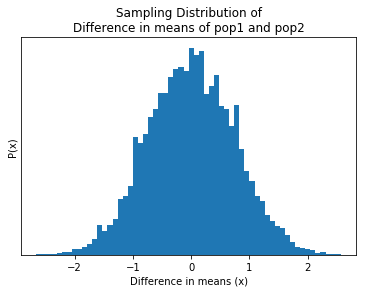

In [10]:
figure_num = 1
plt.figure(figure_num)
figure_num += 1
plt.title('Sampling Distribution of\nDifference in means of pop1 and pop2')
plt.xlabel('Difference in means (x)')
plt.ylabel('P(x)')
plt.yticks([])
plt.hist(diff_in_means, bins=60, density=True)
plt.show(block=False)

In [11]:
x_overline = np.mean(pop1) - np.mean(pop2)
sigma_0 = np.std(diff_in_means)
mu_0 = np.mean(diff_in_means)
z = (x_overline - mu_0) / sigma_0
p = 2 * (1 - norm.cdf(z))
print('The z-value is:', z)
print('The two sided p-value is:', p)

The z-value is: 2.5328129326156494
The two sided p-value is: 0.0113151320630549


In [12]:
# PART B 
print('PART B\n')

PART B



In [13]:
vox1 = data['vox1']
vox2 = data['vox2']

In [14]:
vox1_bootstrap = bootstrap(vox1, NUM_SAMPLES)
vox2_bootstrap = bootstrap(vox2, NUM_SAMPLES)

In [15]:
corr_bootstrap = np.zeros(NUM_SAMPLES)
for i in range(NUM_SAMPLES):
    corr_bootstrap[i] = np.corrcoef(vox1_bootstrap[i], 
                                    vox2_bootstrap[i])[0, 1]

In [16]:
# Function to compute the confidence interval of data samples
def compute_confidence_interval(data, confidence):
    """
    Given the data and the confidence level, computes the confidence interval
    of the data samples.
    Args:
        data: The given data
        confidence: The confidence level, known as alpha (between 0 and 100)
    Returns:
        lower: The lowerbound of the confidence interval
        upper: The upperbound of the confidence interval
    """
    sorted_data = np.sort(data)
    lower = np.percentile(sorted_data, (100 - confidence) / 2)
    upper = np.percentile(sorted_data, confidence + (100 - confidence) / 2)
    return lower, upper

In [17]:
corr_mean = np.mean(corr_bootstrap)
corr_lower, corr_upper = compute_confidence_interval(corr_bootstrap, 95)
print('Mean correlation value:', corr_mean)
print('95%% confidence interval of the correlation values: (%1.5f, %1.5f)' %
      (corr_lower, corr_upper))

Mean correlation value: 0.5575702100845678
95% confidence interval of the correlation values: (0.32057, 0.75761)


In [18]:
corr_zero_percentage = 100 * np.size(np.where(np.isclose(corr_bootstrap, 0))) / NUM_SAMPLES
print('Percentage of zero correlation values:', corr_zero_percentage)

Percentage of zero correlation values: 0.0


In [19]:
# PART C
print('PART C')

PART C


In [20]:
vox1_independent = bootstrap(vox1, NUM_SAMPLES, seed=17)
vox2_independent  = bootstrap(vox2, NUM_SAMPLES, seed=51)

In [21]:
y = np.zeros(NUM_SAMPLES)
for i in range(NUM_SAMPLES):
    y[i] = np.corrcoef(vox1_independent [i], vox2_independent [i])[0, 1]

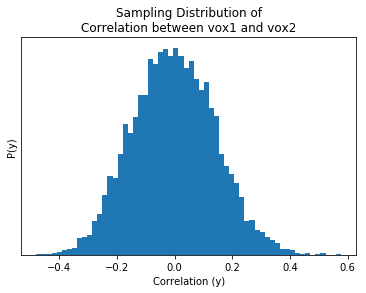

In [22]:
plt.figure(figure_num)
figure_num += 1
plt.title('Sampling Distribution of\nCorrelation between vox1 and vox2')
plt.xlabel('Correlation (y)')
plt.ylabel('P(y)')
plt.yticks([])
plt.hist(y, bins=60, density=True)
plt.show(block=False)

In [23]:
y_overline = np.corrcoef(vox1, vox2)[0, 1]
sigma_0 = np.std(y)
mu_0 = np.mean(y)
z = (y_overline - mu_0) / sigma_0
p = 1 - norm.cdf(z)
print('The z-value is:', z)
print('The one sided p-value is:', p)

The z-value is: 3.984898491468329
The one sided p-value is: 3.375448908071732e-05


In [24]:
# PART D
print('PART D')

PART D


In [25]:
building = data['building']
face = data['face']

In [26]:
diff_in_means = []
np.random.seed(7)
for i in range(NUM_SAMPLES):
    resample = []
    for j in range(np.size(face)):
        indices = np.random.choice(np.size(face))
        options = [0, 0]
        options.append(building[j] - face[j])
        options.append(face[j] - building[j])
        resample.append(np.random.choice(options))
    diff_in_means.append(np.mean(resample))
diff_in_means = np.array(diff_in_means)

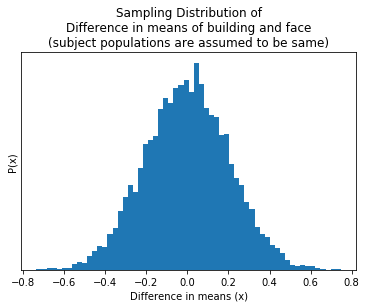

In [27]:
plt.figure(figure_num)
figure_num += 1
plt.title('Sampling Distribution of\nDifference in means of building and face\n'
          '(subject populations are assumed to be same)')
plt.xlabel('Difference in means (x)')
plt.ylabel('P(x)')
plt.yticks([])
plt.hist(diff_in_means, bins=60, density=True)
plt.show(block=False)

In [28]:
x_overline = np.mean(building) - np.mean(face)
sigma_0 = np.std(diff_in_means)
mu_0 = np.mean(diff_in_means)
z = (x_overline - mu_0) / sigma_0
p = 2 * (1 - norm.cdf(np.abs(z)))
print('The z-value is:', z)
print('The two sided p-value is:', p)

The z-value is: -3.6447496655297713
The two sided p-value is: 0.0002676521981408442


In [29]:
# PART E
print('PART E')

PART E


In [30]:
diff_in_means, vals, probs = difference_in_means(building, face, NUM_SAMPLES)

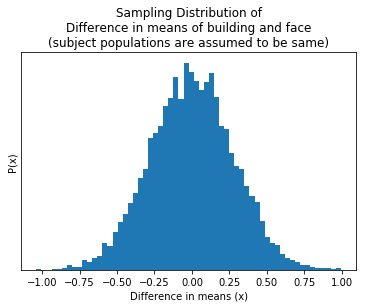

In [31]:
plt.figure(figure_num)
figure_num += 1
plt.title('Sampling Distribution of\nDifference in means of building and face\n'
          '(subject populations are assumed to be same)')
plt.xlabel('Difference in means (x)')
plt.ylabel('P(x)')
plt.yticks([])
plt.hist(diff_in_means, bins=60, density=True)
plt.show(block=False)

In [32]:
x_overline = np.mean(building) - np.mean(face)
sigma_0 = np.std(diff_in_means)
mu_0 = np.mean(diff_in_means)
z = (x_overline - mu_0) / sigma_0
p = 2 * (1 - norm.cdf(np.abs(z)))
print('The z-value is:', z)
print('The two sided p-value is:', p)

The z-value is: -2.686851787380054
The two sided p-value is: 0.00721289501971123


In [33]:
plt.show()